# SVC (당뇨병 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.데이터 준비

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv

--2024-12-30 07:12:34--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.009s  

2024-12-30 07:12:35 (2.42 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.정보확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 범주형 변수

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


### 숫자형 변수

In [ ]:
df['Pregnancies'].value_counts().sort_index()

,count
Pregnancies,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38


## 3.결측치

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 4.이상치

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_tmp = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

In [ ]:
for i, col in enumerate(df_tmp.columns):
  print(col, len(df[df[col] == 0]))

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


## 5.데이터 분리

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
y_train.value_counts()

,count
Outcome,
0,400
1,214


## 6.이상치 처리

In [ ]:
for i, col in enumerate(df_tmp.columns):
  print(col, len(df[df[col] == 0]))

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [ ]:
df_tmp.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
X_train[cols] = X_train[cols].replace(0, np.nan)

In [ ]:
X_train.isna().sum()

,0
Pregnancies,0
Glucose,4
BloodPressure,23
SkinThickness,175
Insulin,290
BMI,9
DiabetesPedigreeFunction,0
Age,0


In [ ]:
mean_dict = {}

for col in cols:
  u = X_train[col].mean()
  X_train[col] = X_train[col].fillna(u)
  mean_dict[col] = u

In [ ]:
X_train.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [ ]:
mean_dict

{'Glucose': 121.70163934426229,
 'BloodPressure': 72.14551607445009,
 'SkinThickness': 29.059225512528474,
 'Insulin': 149.07716049382717,
 'BMI': 32.44892561983471}

In [ ]:
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.000000,43.00000,27.2,0.580,24
711,5,126.0,78.0,27.000000,22.00000,29.6,0.439,40
373,2,105.0,58.0,40.000000,94.00000,34.9,0.225,25
46,1,146.0,56.0,29.059226,149.07716,29.7,0.564,29
682,0,95.0,64.0,39.000000,105.00000,44.6,0.366,22
360,5,189.0,64.0,33.000000,325.00000,31.2,0.583,29
414,0,138.0,60.0,35.000000,167.00000,34.6,0.534,21
339,7,178.0,84.0,29.059226,149.07716,39.9,0.331,41
694,2,90.0,60.0,29.059226,149.07716,23.5,0.191,25
33,6,92.0,92.0,29.059226,149.07716,19.9,0.188,28


## 7.스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

In [ ]:
# 인코딩 필요없음
y_train

,Outcome
353,0
711,0
373,0
46,0
682,0
...,...
451,1
113,0
556,0
667,1


In [ ]:
type(X_train_s), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
y_train = y_train.to_numpy()
type(X_train_s), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train_s.shape, y_train.shape

((614, 8), (614,))

## 8.학습

### 베이스모델

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(random_state=42)
clf.fit(X_train_s, y_train)

SVC(random_state=42)

In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 9.테스트

In [ ]:
# 이상치 처리
X_test[cols] = X_test[cols].replace(0, np.nan)

for col in cols:
  u = mean_dict[col]
  X_test[col] = X_test[col].fillna(u)
  mean_dict[col] = u

### 스케일링

In [ ]:
X_test_s = ss.transform(X_test)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
X_test_s.shape, y_test.shape

((154, 8), (154,))

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

## 10.모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.7402597402597403
recall:  0.537
precision:  0.6591
f1:  0.5918


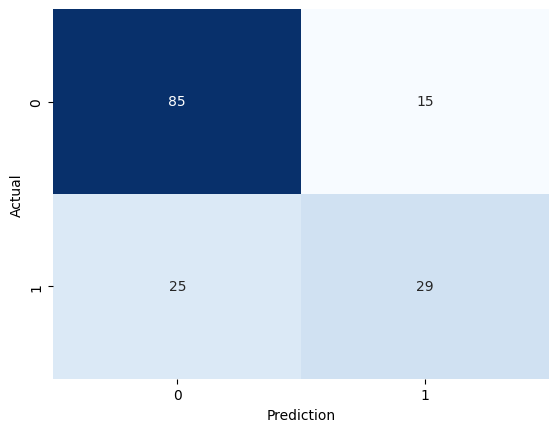

In [ ]:
print_metrics(y_test, y_pred)

## 11.모델 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = SVC(random_state=43)
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'degree': [2, 3],
    'kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
gs = GridSearchCV(estimator=clf,
             param_grid=params,
             cv=5,
             n_jobs=-1,
             verbose=3,
             refit=True)

In [ ]:
gs.fit(X_train_s, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(random_state=43), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [ ]:
# 베스트 결과가 나오는 파라미터의 조합
gs.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

## 12.모델 저장

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'svc_bin_diabetes_params.pkl')

['svc_bin_diabetes_params.pkl']

In [ ]:
clf = joblib.load('svc_bin_diabetes_params.pkl')

In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 43,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
joblib.dump(mean_dict, 'svc_bin_diabetes_mean_dict.pkl')

['svc_bin_diabetes_mean_dict.pkl']

In [ ]:
joblib.dump(ss, 'svc_bin_diabetes_ss.pkl')

['svc_bin_diabetes_ss.pkl']

## 13.KNN 모델

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for i in range(5, 30):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_s, y_train)
  y_pred = clf.predict(X_test_s)
  acc = (y_pred == y_test).sum()/len(y_test)
  print(f'k = {i}, acc = {acc}')

k = 5, acc = 0.7402597402597403
k = 6, acc = 0.7272727272727273
k = 7, acc = 0.7467532467532467
k = 8, acc = 0.7792207792207793
k = 9, acc = 0.7532467532467533
k = 10, acc = 0.7272727272727273
k = 11, acc = 0.7337662337662337
k = 12, acc = 0.7272727272727273
k = 13, acc = 0.7337662337662337
k = 14, acc = 0.7077922077922078
k = 15, acc = 0.7337662337662337
k = 16, acc = 0.7402597402597403
k = 17, acc = 0.7402597402597403
k = 18, acc = 0.7532467532467533
k = 19, acc = 0.7467532467532467
k = 20, acc = 0.7532467532467533
k = 21, acc = 0.7597402597402597
k = 22, acc = 0.7597402597402597
k = 23, acc = 0.7597402597402597
k = 24, acc = 0.7532467532467533
k = 25, acc = 0.7467532467532467
k = 26, acc = 0.7597402597402597
k = 27, acc = 0.7597402597402597
k = 28, acc = 0.7662337662337663
k = 29, acc = 0.7532467532467533


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[86, 14],
       [24, 30]])

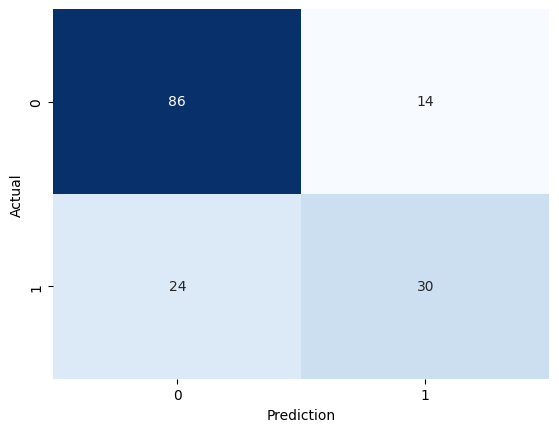

In [ ]:
s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()